<a href="https://colab.research.google.com/github/DuboisMax/TP2-MATHS/blob/main/TP2_%F0%9F%8D%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math, numpy as np, matplotlib.pyplot as plt
from time import time

In [ ]:
#pivot Gauss
def pivot(A, p):
    n=A.shape[0]
    i = p
    for k in range(p + 1, n):
        if abs(A[k, p]) > abs(A[i, p]):
            i = k
    return i
def gauss(A, b):
    A1, b1 = A.copy(), b.copy()
    n = len(b)
    for l in range(n - 1):
        piv = pivot(A, l)
        if piv != l:
            Li = A[l, :].copy()
            A[l, :] = A[piv, :]
            A[piv, :] = Li
            Ep = b1[piv]
            b1[piv] = b1[l]
            b1[l] = Ep
        for k in range(l + 1, n):
            fac = -A1[k, l] / A1[l, l]
            A1[k, :] += fac * A1[l, :]
            b1[k] = b1[k] + b1[l] * fac
    return A1, b1

def remontee(A, b):
    n = len(b)
    x = np.zeros([n])
    for i in range(n - 1, -1, -1):
        somme = np.dot(A[i, :], x)
        x[i] = (b[i] - somme) / A[i, i]
    return x
def solve_gauss(A, b):
    A1, b1 = gauss(A, b)
    return remontee(A1, b1)

In [ ]:
#LU décomposition

def dec_lu_tridiag(A):
    n=np.shape(A)[0]
    L, U=np.zeros((n,n)),np.eye(n)
    L[0,0]=A[0,0]
    L[1,0]=A[1,0]
    U[0,1]=A[0,1]/A[1,1]
    for i in range(1,n-1):
        L[i+1,i]=A[i+1,i]
        L[i,i]=A[i,i]-A[i,i-1]*U[i-1,i]
        U[i,i+1]=A[i-1,i]/L[i,i]
    L[n-1,n-1]=A[n-1,n-1]-A[n-1,n-2]*U[n-2,n-1]
    return L,U

def tridiag_matrice(a,b,c,n):
    #np.diag(a*np.ones(n),0)+np.diag(c*np.ones(n-1),1)+np.diag(b*np.ones(n-1),-1)
    return a*np.eye(n)+b*np.eye(n,k=-1)+c*np.eye(n,k=1)

n=100
h= 2/(n+1)
M = np.eye(n)*4*(1-1/h**2)+np.eye(n,k=-1)*(2/h**2-1/(2*h))+np.eye(n,k=1)*(2/h**2+1/2*h)
#print(dec_lu_tridiag(M))

def colonne_f(taille_vecteur,ci):
    colonne = [1-i**2 + 5*i for i in range(taille_vecteur)]
    colonne[0] -= ci[0]*( 2/ h**2 - 1/ (2*h) )
    colonne[-1] -= ci[1]*( 2/ h**2 + 1/ (2*h) )
    return np.array(colonne)

def descente(A, b):
    n = len(b)
    x = np.zeros([n])
    for i in range(n):
        somme = np.dot(A[i, :], x)
        x[i] = (b[i] - somme) / A[i, i]
    return x

L,U = dec_lu_tridiag(M)
vec_f = colonne_f(n,(0.05,0.05))

y =descente(L,vec_f)
#print(y)

def remontee(A,b):
    n = len(b)
    x = np.zeros([n])
    for i in range(n - 1, -1, -1):
        somme = np.dot(A[i, :], x)
        x[i] = (b[i] - somme) / A[i, i]
    return x

Y_lu=remontee(U,y)
Y_linalg=np.linalg.solve(M,vec_f)
#print(max(abs(Y_lu-Y_linalg)))
x = np.linspace(0,2,100)
plt.plot(x,Y_qr,x,Y_lu)
plt.show()


[2.47879278e-02 1.57742258e-02 1.07172683e-02 7.40559222e-03
 5.29668750e-03 4.32144384e-03 4.58437236e-03 6.26296341e-03
 9.56686320e-03 1.47188805e-02 2.19451649e-02 3.14696895e-02
 4.35109518e-02 5.82799176e-02 7.59787164e-02 9.67998248e-02
 1.20925587e-01 1.48527982e-01 1.79768569e-01 2.14798583e-01
 2.53759139e-01 2.96781518e-01 3.43987533e-01 3.95489930e-01
 4.51392842e-01 5.11792252e-01 5.76776487e-01 6.46426700e-01
 7.20817366e-01 8.00016761e-01 8.84087427e-01 9.73086630e-01
 1.06706678e+00 1.16607586e+00 1.27015779e+00 1.37935279e+00
 1.49369773e+00 1.61322642e+00 1.73796993e+00 1.86795680e+00
 2.00321334e+00 2.14376379e+00 2.28963055e+00 2.44083437e+00
 2.59739448e+00 2.75932874e+00 2.92665380e+00 3.09938518e+00
 3.27753738e+00 3.46112399e+00 3.65015776e+00 3.84465068e+00
 4.04461401e+00 4.25005839e+00 4.46099387e+00 4.67742993e+00
 4.89937557e+00 5.12683930e+00 5.35982920e+00 5.59835292e+00
 5.84241776e+00 6.09203062e+00 6.34719809e+00 6.60792642e+00
 6.87422156e+00 7.146089

2.2453150450019166e-12


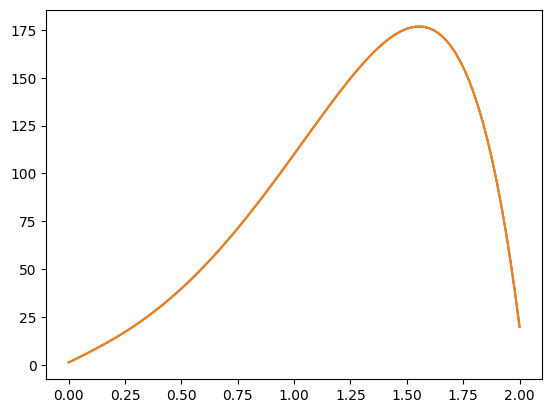

In [ ]:
#décomposition Q&R
def qr_decomposition(A):
    m, n = A.shape
    Q = np.zeros((m, n))
    R = np.zeros((n, n))

    for j in range(n):
        v = A[:, j]
        for i in range(j):
            R[i, j] = np.dot(Q[:, i], A[:, j])
            v = v - R[i, j] * Q[:, i]
        R[j, j] = np.linalg.norm(v)
        Q[:, j] = v / R[j, j]

    return Q, R

Q,R = qr_decomposition(M)

b_new = np.dot(Q.T, vec_f)

Y_qr = np.linalg.solve(R, b_new)

#print("Vecteur solution x :", x_solution)
print(max(abs(Y_qr-Y_linalg)))

x = np.linspace(0,2,100)
plt.plot(x,Y_qr,x,Y_lu)
plt.show()



In [24]:
import numpy as np
#1
def décomposition(A):
    n = len(A)
    A1 = np.copy(A)
    D, E, F = np.zeros((n, n)), np.zeros((n, n)), np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i < j:
                F[i, j] = -A1[i, j]
            elif i > j:
                E[i, j] = -A1[i, j]
            else:
                D[i, j] = A1[i, j]
    return D, E, F

#2

def jacobi_relaxation(A, b, x0, w, tol, max_iter=1000):
    """
    Solve the linear system Ax = b using the Jacobi relaxation method.

    Parameters:
    A (numpy.ndarray): Coefficient matrix of shape (n, n).
    b (numpy.ndarray): Right-hand side vector of shape (n,).
    x0 (numpy.ndarray): Initial guess for the solution vector of shape (n,).
    omega (float): Relaxation parameter (default is 1.0).
    tol (float): Tolerance for the stopping criterion.
    max_iter (int): Maximum number of iterations.

    Returns:
    x (numpy.ndarray): Solution vector.
    num_iter (int): Number of iterations performed.
    """
    n = len(b)
    x = x0.copy()
    num_iter = 0

    while num_iter < max_iter:
        x_new = np.zeros_like(x)
        for i in range(n):
            x_new[i] = (1 - w) * x[i] + w * (b[i] - np.dot(A[i, :i], x[:i]) - np.dot(A[i, i+1:], x[i+1:])) / A[i, i]

        if np.linalg.norm(x_new - x) < tol:
            break

        x = x_new.copy()
        num_iter += 1

    return x, num_iter

# Example usage:
w=1
n=100
h= 2/(n+1)
M = np.eye(n)*4*(1-1/h**2)+np.eye(n,k=-1)*(2/h**2-1/(2*h))+np.eye(n,k=1)*(2/h**2+1/2*h)
b = np.ones((100, 1))
x0 = np.zeros_like(b)
eps = 10**-4
#print(abs(np.dot(M,b)-x).max())
tol = abs(np.dot(M,b)-x).max() < eps

solution, num_iterations = jacobi_relaxation(M, b, x0, w, tol)
print("Solution:", solution)
print("Number of iterations:", num_iterations)


Solution: [[-0.00291604]
 [-0.00563438]
 [-0.008168  ]
 [-0.01052901]
 [-0.01272874]
 [-0.01477782]
 [-0.01668615]
 [-0.018463  ]
 [-0.02011706]
 [-0.02165644]
 [-0.02308871]
 [-0.02442098]
 [-0.02565987]
 [-0.02681158]
 [-0.0278819 ]
 [-0.02887625]
 [-0.02979968]
 [-0.03065692]
 [-0.03145238]
 [-0.03219019]
 [-0.03287418]
 [-0.03350796]
 [-0.03409486]
 [-0.034638  ]
 [-0.0351403 ]
 [-0.03560447]
 [-0.03603301]
 [-0.03642829]
 [-0.03679247]
 [-0.03712758]
 [-0.03743549]
 [-0.03771793]
 [-0.0379765 ]
 [-0.0382127 ]
 [-0.03842787]
 [-0.03862326]
 [-0.03880003]
 [-0.0389592 ]
 [-0.03910174]
 [-0.03922849]
 [-0.03934023]
 [-0.03943763]
 [-0.03952131]
 [-0.03959179]
 [-0.03964952]
 [-0.03969487]
 [-0.03972817]
 [-0.03974964]
 [-0.03975945]
 [-0.03975771]
 [-0.03974446]
 [-0.03971967]
 [-0.03968324]
 [-0.03963502]
 [-0.03957479]
 [-0.03950225]
 [-0.03941704]
 [-0.03931875]
 [-0.03920688]
 [-0.03908086]
 [-0.03894007]
 [-0.03878378]
 [-0.03861122]
 [-0.03842151]
 [-0.0382137 ]
 [-0.03798675]
